## Programming Exercise 8: Anomaly Detection and Recommender Systems

In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.optimize #Use for fmincg

### 1 Anomaly detection

In [70]:
datafile = "ex8data1.mat"
mat = scipy.io.loadmat(datafile)
X = mat["X"]
ycv = mat["yval"]
Xcv = mat["Xval"]

In [71]:
# Visualize the data
def plotData(myX, newFig=False):
    if newFig:
        plt.figure(figsize=(8,6))
    plt.plot(X[:, 0], X[:, 1],'b+')
    plt.xlabel('Latency [ms]',fontsize=16)
    plt.ylabel('Throughput [mb/s]',fontsize=16)
    plt.grid(True)

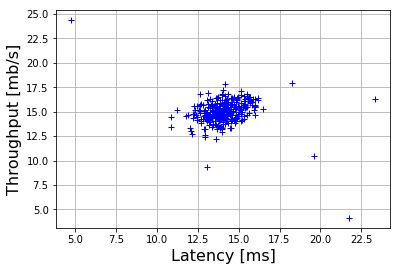

In [72]:
plotData(X)

#### 1.1 Gaussian distribution

In [73]:
def gaus(myX, mymu, mysig2):
    """
    Function to compute the gaussian return values for a feature
    matrix, myX, given the already computed mu vector and sigma matrix.
    If sigma is a vector, it is turned into a diagonal matrix
    Uses a loop over rows; I didn't quite figure out a vectorized implementation.
    """
    m = myX.shape[0]
    n = myX.shape[1]
    if np.ndim(mysig2) == 1:
        mysig2 = np.diag(mysig2)
    norm = 1/(np.power((2*np.pi), np.sqrt(np.linalg.det(mysig2))))
    myinv = np.linalg.inv(mysig2)
    myexp = np.zeros((m, 1))
    for irow in range(m):
        xrow = myX[irow]
        myexp[irow] = np.exp(-0.5*((xrow-mymu).T).dot(myinv).dot(xrow-mymu))
    return norm*myexp


#### 1.2 Estimating parameters for a Gaussian

In [74]:
def getGaussianParams(myX,useMultivariate = True):
    """
    Function that given a feature matrix X that is (m x n)
    returns a mean vector and a sigmasquared vector that are
    both (n x 1) in shape.
    This can do it either as a 1D gaussian for each feature,
    or as a multivariate gaussian.
    """
    m = myX.shape[0]
    mu = np.mean(myX, axis = 0)
    if not useMultivariate:
        sigma2 = np.sum(np.square(myX-mu), axis = 0)/(m)
        return mu, sigma2
    else:
        sigma2 = ((myX-mu).T.dot(myX-mu))/(m)
        return mu, sigma2

In [75]:
mu, sig2 = getGaussianParams(X, useMultivariate = True)

##### 1.2.1 Visualizing the Gaussian probability contours

In [76]:
def plotContours(mymu, mysigma2, newFig=False, useMultivariate = True):
    delta = .5
    myx = np.arange(0,30,delta)
    myy = np.arange(0,30,delta)
    meshx, meshy = np.meshgrid(myx, myy)
    coord_list = [ entry.ravel() for entry in (meshx, meshy) ]
    points = np.vstack(coord_list).T
    myz = gaus(points, mymu, mysigma2)
    #if not useMultivariate:
    #    myz = gausOrthog(points, mymu, mysigma2)
    #else: myz = gausMV(points, mymu, mysigma2)
    myz = myz.reshape((myx.shape[0],myx.shape[0]))

    if newFig: plt.figure(figsize=(6,4))
    
    cont_levels = [10**exp for exp in range(-20,0,3)]
    mycont = plt.contour(meshx, meshy, myz, levels=cont_levels)

    plt.title('Gaussian Contours',fontsize=16)

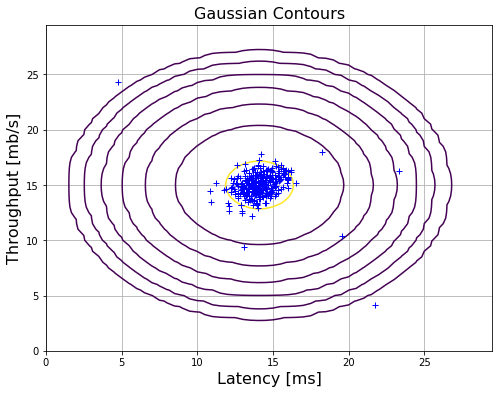

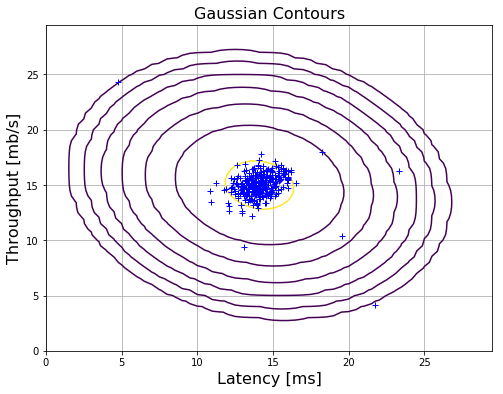

In [77]:
# First contours without using multivariate gaussian:
plotData(X, newFig=True)
useMV = False
plotContours(*getGaussianParams(X, useMV), newFig=False, useMultivariate = useMV)

# Then contours with multivariate gaussian:
plotData(X, newFig=True)
useMV = True
plotContours(*getGaussianParams(X, useMV), newFig=False, useMultivariate = useMV)

#### 1.3 Selecting the threshold, $\epsilon$

In [78]:
def computeF1(predVec, trueVec):
    """
    F1 = 2 * (P*R)/(P+R)
    where P is precision, R is recall
    Precision = "of all predicted y=1, what fraction had true y=1"
    Recall = "of all true y=1, what fraction predicted y=1?
    Note predictionVec and trueLabelVec should be boolean vectors.
    """
    #print predVec.shape
    #print trueVec.shape
    #assert predVec.shape == trueVec.shape
    
    P, R = 0., 0.
    if float(np.sum(predVec)):
        P = None
    if float(np.sum(trueVec)):
        R = None
    
    
    return None if (P+R) else 0
    

In [79]:
def selectThreshold(myycv, mypCVs):
    """
    Function to select the best epsilon value from the CV set
    by looping over possible epsilon values and computing the F1
    score for each.
    """
    # Make a list of possible epsilon values
    nsteps = 1000
    epses = np.linspace(np.min(mypCVs),np.max(mypCVs),nsteps)
    
    # Compute the F1 score for each epsilon value, and store the best 
    # F1 score (and corresponding best epsilon)
    bestF1, bestEps = 0, 0
    trueVec = (myycv == 1).flatten()
    for eps in epses:
        predVec = None < None
        thisF1 = computeF1(predVec, trueVec)
        if None > None:
            bestF1 = None
            bestEps = None
            
    print("Best F1 is %f, best eps is %0.4g."%(bestF1,bestEps))
    return bestF1, bestEps
        

In [80]:
# Using the gaussian parameters from the full training set,
# figure out the p-value for each point in the CV set
pCVs = gaus(None, None, None)

#You should see a value for epsilon of about 8.99e-05.
bestF1, bestEps = selectThreshold(None, None)

AttributeError: 'NoneType' object has no attribute 'shape'

In [81]:
def plotAnomalies(myX, mybestEps, newFig = False, useMultivariate = True):
    ps = gaus(myX, *getGaussianParams(myX, useMultivariate))
    anoms = np.array([myX[x] for x in range(myX.shape[0]) if ps[x] < mybestEps])
    if newFig: plt.figure(figsize=(6,4))
    plt.scatter(anoms[:,0],anoms[:,1], s=80, facecolors='none', edgecolors='r')

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

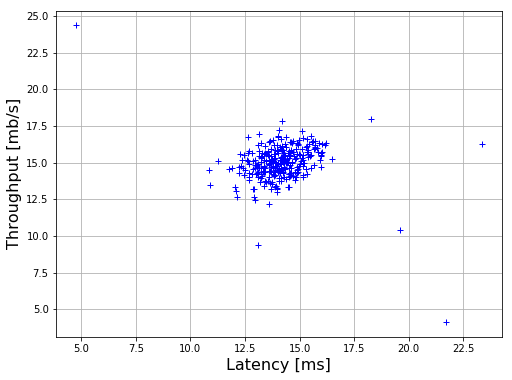

In [82]:
plotData(None, newFig=True)
plotContours(None, None, newFig=False, useMultivariate=True)
plotAnomalies(None, None, newFig=False, useMultivariate=True)

#### 1.4 High dimensional dataset

In [83]:
datafile = "ex8data2.mat"
mat = scipy.io.loadmat(datafile)
Xpart2 = mat["X"]
ycvpart2 = mat["yval"]
Xcvpart2 = mat["Xval"]
print("Xpart2 shape is ", Xpart2.shape)

Xpart2 shape is  (1000, 11)


In [84]:
mu, sig2 = getGaussianParams(Xpart2, useMultivariate=False)
ps = gaus(Xpart2, mu, sig2)
psCV = gaus(Xcvpart2, mu, sig2)

# Using the gaussian parameters from the full training set,
# figure out the p-value for each point in the CV set
pCVs = gaus(Xcvpart2, mu, sig2)

# You should see a value epsilon of about 1.38e-18, and 117 anomalies found.
bestF1, bestEps = selectThreshold(Xcvpart2, pCVs)
anoms = [Xpart2[x] for x in range(Xpart2.shape[0]) if ps[x] < bestEps]
print('# of anomalies found: ',len(anoms))

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in power
  if sys.path[0] == '':


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

### 2 Recommender Systems

#### 2.1 Movie ratings dataset

In [85]:
datafile = "ex8_movies.mat"
mat = scipy.io.loadmat(datafile)
Y = ["Y"]
R = ["R"]

nm, nu = Y.shape
# Y is 1682x943 containing ratings (1-5) of 1682 movies on 943 users
# a rating of 0 means the movie wasn't rated
# R is 1682x943 containing R(i,j) = 1 if user j gave a rating to movie i

AttributeError: 'list' object has no attribute 'shape'

In [86]:
print('Average rating for movie 1 (Toy Story): %0.2f' % np.mean([ Y[0][x] for x in range(Y.shape[1]) if R[0][x] ]))

# "Visualize the ratings matrix"
fig = plt.figure(figsize=(6,6*(1682./943.)))
dummy = plt.imshow(Y)
dummy = plt.colorbar()
dummy = plt.ylabel('Movies (%d)'%nm,fontsize=20)
dummy = plt.xlabel('Users (%d)'%nu,fontsize=20)

AttributeError: 'list' object has no attribute 'shape'

In [87]:
# Throughout this part of the exercise, you will also be 
# working with the matrices, X and Theta
# The i-th row of X corresponds to the feature vector x(i) for the i-th movie, 
# and the j-th row of Theta corresponds to one parameter vector θ(j), for the j-th user. 
# Both x(i) and θ(j) are n-dimensional vectors. For the purposes of this exercise, 
# you will use n = 100, and therefore, x(i) ∈ R100 and θ(j) ∈ R100. Correspondingly, 
# X is a nm × 100 matrix and Theta is a nu × 100 matrix.

#### 2.2 Collaborative filtering learning algorithm

In [88]:
# Read in the movie params matrices
datafile = "ex8_movieParams.mat"
mat = scipy.io.loadmat(datafile)
X = mat["X"]
Theta = mat["Theta"]
nu = int(mat["num_users"])
nm = int(mat["num_movies"])
nf = int(mat["num_features"])

# For now, reduce the data set size so that this runs faster
nu = 4
nm = 5
nf = 3

X = X[:nm,:nf]
Theta = Theta[:nu,:nf]
Y = Y[:nm,:nu]
R = R[:nm,:nu]

TypeError: list indices must be integers or slices, not tuple

In [89]:
# The "parameters" we are minimizing are both the elements of the
# X matrix (nm*nf) and of the Theta matrix (nu*nf)
# To use off-the-shelf minimizers we need to flatten these matrices
# into one long array
def flattenParams(myX, myTheta):
    """
    Hand this function an X matrix and a Theta matrix and it will flatten
    it into into one long (nm*nf + nu*nf,1) shaped numpy array
    """
    return np.concatenate((myX.flatten(), myTheta.flatten()))

# A utility function to re-shape the X and Theta will probably come in handy
def reshapeParams(flattened_XandTheta, mynm, mynu, mynf):
    assert flattened_XandTheta.shape[0] == int(nm*nf+nu*nf)
    
    reX = flattened_XandTheta[:int(mynm*mynf)].reshape((mynm, mynf))
    reTheta = flattened_XandTheta[int(mynm*mynf):].reshape((mynm, mynf))
    
    return reX, reTheta

##### 2.2.1 Collaborative filtering cost function and 2.2.3 Regularized cost function

In [90]:
def cofiCostFunc(myparams, myY, myR, mynu, mynm, mynf, mylambda = 0.):
    
    # Unfold the X and Theta matrices from the flattened params
    myX, myTheta = reshapeParams(myparams, mynm, mynu, mynf)
  
    # Note: 
    # X Shape is (nm x nf), Theta shape is (nu x nf), Y and R shape is (nm x nu)
    # Behold! Complete vectorization
    
    # First dot theta and X together such that you get a matrix the same shape as Y
    term1 = None
    
    # Then element-wise multiply that matrix by the R matrix
    # so only terms from movies which that user rated are counted in the cost
    term1 = None
    
    # Then subtract the Y- matrix (which has 0 entries for non-rated
    # movies by each user, so no need to multiply that by myR... though, if
    # a user could rate a movie "0 stars" then myY would have to be element-
    # wise multiplied by myR as well) 
    # also square that whole term, sum all elements in the resulting matrix,
    # and multiply by 0.5 to get the cost
    cost = 0.5 * np.sum( np.square(None-None) )
    
    # Regularization stuff
    cost += (mylambda/2.) * np.sum(np.square(myTheta))
    cost += (mylambda/2.) * np.sum(np.square(myX))
    
    return cost

In [91]:
# "...run your cost function. You should expect to see an output of 22.22."
print('Cost with nu = 4, nm = 5, nf = 3 is %0.2f.' % cofiCostFunc(flattenParams(None,None),None,None,None,None,None))
    
# "...with lambda = 1.5 you should expect to see an output of 31.34."
print('Cost with nu = 4, nm = 5, nf = 3 (and lambda = 1.5) is %0.2f.' % cofiCostFunc(flattenParams(None,None),None,None,None,None,None,mylambda=1.5))

AttributeError: 'NoneType' object has no attribute 'flatten'

##### 2.2.2 Collaborative filtering gradient and 2.2.4 Regularized gradient

In [56]:
# Remember: use the exact same input arguments for gradient function
# as for the cost function (the off-the-shelf minimizer requires this)
def cofiGrad(myparams, myY, myR, mynu, mynm, mynf, mylambda = 0.):
    
    # Unfold the X and Theta matrices from the flattened params
    myX, myTheta = reshapeParams(None, None, None, None)

    # First the X gradient term 
    # First dot theta and X together such that you get a matrix the same shape as Y
    term1 = None
    # Then multiply this term by myR to remove any components from movies that
    # weren't rated by that user
    term1 = None
    # Now subtract the y matrix (which already has 0 for nonrated movies)
    term1 -= None
    # Lastly dot this with Theta such that the resulting matrix has the
    # same shape as the X matrix
    Xgrad = None
    
    # Now the Theta gradient term (reusing the "term1" variable)
    Thetagrad = None

    # Regularization stuff
    Xgrad += mylambda * myX
    Thetagrad += mylambda * myTheta
    
    return flattenParams(Xgrad, Thetagrad)

In [57]:
#Let's check my gradient computation real quick:
def checkGradient(myparams, myY, myR, mynu, mynm, mynf, mylambda = 0.):
    
    print('Numerical Gradient \t cofiGrad \t\t Difference')
    
    # Compute a numerical gradient with an epsilon perturbation vector
    myeps = 0.0001
    nparams = len(myparams)
    epsvec = np.zeros(nparams)
    # These are my implemented gradient solutions
    mygrads = cofiGrad(None,None,None,None,None,None,None)

    # Choose 10 random elements of my combined (X, Theta) param vector
    # and compute the numerical gradient for each... print to screen
    # the numerical gradient next to the my cofiGradient to inspect
    
    for i in range(10):
        idx = np.random.randint(0,nparams)
        epsvec[idx] = myeps
        loss1 = cofiCostFunc(myparams-epsvec,myY,myR,mynu,mynm,mynf,mylambda)
        loss2 = cofiCostFunc(myparams+epsvec,myY,myR,mynu,mynm,mynf,mylambda)
        mygrad = (loss2 - loss1) / (2*myeps)
        epsvec[idx] = 0
        print('%0.15f \t %0.15f \t %0.15f' % (mygrad, mygrads[idx],mygrad - mygrads[idx]))

In [58]:
print("Checking gradient with lambda = 0...")
checkGradient(flattenParams(X,Theta),Y,R,nu,nm,nf)
print("\nChecking gradient with lambda = 1.5...")
checkGradient(flattenParams(X,Theta),Y,R,nu,nm,nf,mylambda = 1.5)

Checking gradient with lambda = 0...
Numerical Gradient 	 cofiGrad 		 Difference


AttributeError: 'NoneType' object has no attribute 'shape'

#### 2.3 Learning movie recommendations
##### 2.3.1 Recommendations

In [59]:
# So, this file has the list of movies and their respective index in the Y vector
# Let's make a list of strings to reference later
movies = []
# The encoding on this file is different than the rest. Use ISO-8859-1 encoding
f = open('data/movie_ids.txt', 'r', encoding = "ISO-8859-1")
for line in f:
    movies.append(' '.join(line.strip('\n').split(' ')[1:]))

# Rather than rate some movies myself, I'll use what was built-in to the homework
# (just so I can check my solutions)
my_ratings = np.zeros((1682,1))
my_ratings[0]   = 4
my_ratings[97]  = 2
my_ratings[6]   = 3
my_ratings[11]  = 5
my_ratings[53]  = 4
my_ratings[63]  = 5
my_ratings[65]  = 3
my_ratings[68]  = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

FileNotFoundError: [Errno 2] No such file or directory: 'data/movie_ids.txt'

In [60]:
# I'll re-read in the data because I shortened them earlier (to debug)
datafile = 'data/ex8_movies.mat'
mat = scipy.io.loadmat( None )
Y = None
R = None
# We'll use 10 features
nf = None

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [61]:
# Add my ratings to the Y matrix, and the relevant row to the R matrix
myR_row = my_ratings > 0
Y = np.hstack((Y,my_ratings))
R = np.hstack((R,myR_row))
nm, nu = Y.shape

NameError: name 'my_ratings' is not defined

In [62]:
def normalizeRatings(myY, myR):
    """
    Preprocess data by subtracting mean rating for every movie (every row)
    This is important because without this, a user who hasn't rated any movies
    will have a predicted score of 0 for every movie, when in reality
    they should have a predicted score of [average score of that movie].
    """

    # The mean is only counting movies that were rated
    Ymean = np.sum(myY,axis=1)/np.sum(myR,axis=1)
    Ymean = Ymean.reshape((Ymean.shape[0],1))
    
    return myY-Ymean, Ymean    

In [63]:
Ynorm, Ymean = normalizeRatings(Y,R)

TypeError: cannot perform reduce with flexible type

In [64]:
# Generate random initial parameters, Theta and X
X = np.random.rand(nm,nf)
Theta = np.random.rand(nu,nf)
myflat = flattenParams(X, Theta)

# Regularization parameter of 10 is used (as used in the homework assignment)
mylambda = 10.

# Training the actual model with fmin_cg
result = scipy.optimize.fmin_cg(cofiCostFunc, x0=myflat, fprime=cofiGrad, \
                               args=(Y,R,nu,nm,nf,mylambda), \
                                maxiter=50,disp=True,full_output=True)

AttributeError: 'NoneType' object has no attribute 'shape'

In [65]:
# Reshape the trained output into sensible "X" and "Theta" matrices
resX, resTheta = reshapeParams(result[0], nm, nu, nf)

NameError: name 'result' is not defined

In [66]:
# After training the model, now make recommendations by computing
# the predictions matrix
prediction_matrix = None

In [67]:
# Grab the last user's predictions (since I put my predictions at the
# end of the Y matrix, not the front)
# Add back in the mean movie ratings
my_predictions = prediction_matrix[:,-1] + Ymean.flatten()

TypeError: 'NoneType' object is not subscriptable

In [68]:
# Sort my predictions from highest to lowest
pred_idxs_sorted = np.argsort(my_predictions)
pred_idxs_sorted[:] = pred_idxs_sorted[::-1]

print("Top recommendations for you:")
for i in range(10):
    print('Predicting rating %0.1f for movie %s.' % (my_predictions[pred_idxs_sorted[i]],movies[pred_idxs_sorted[i]]))
    
print("\nOriginal ratings provided:")
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated %d for movie %s.' % (my_ratings[i],movies[i]))

NameError: name 'my_predictions' is not defined